## Predicting Agricultural Production Quantities Using Machine Learning

###### Name          : Shibla PC
###### Organization  : Entri Elevate
###### Date           :26th oct 2024

#### OVERVIEW
###### This project focuses on analyzing and predicting agricultural production quantities for various commodities across different regions and years. 

###### Agricultural production data, encompassing categories such as crop production, livestock inventory, and aquatic products, is essential for 

###### understanding trends in food supply and supporting effective planning in the agriculture sector.


###### The dataset used in this project contains records of agricultural production, with columns indicating the geographical region, year, commodity 

###### category, specific commodity type, production quantity (captured in the "Amount" column), and the unit of measurement. The "Amount" column, 

###### which represents the quantity produced in various units (such as tons, head, and hectares), serves as the target variable for this analysis.



###### The main goal of this project is to build a predictive model that can estimate production quantities based on historical data. By experimenting 

###### with different machine learning models and tuning hyperparameters, this project aims to identify key patterns and influential factors in 

###### agricultural production. Insights gained from the model can be used to predict future production trends and support decision-making processes 

###### for stakeholders, including policymakers, farmers, and agribusinesses.


### Objective
###### The objective of this project is to develop a predictive model for estimating the quantity of agricultural commodities, as represented by the 

###### "Amount" column, across various regions, years, and categories. Using machine learning techniques, the model aims to identify patterns and key 

###### factors that influence production volumes. This will provide insights into agricultural trends and support data-driven decision-making for 

###### stakeholders, such as policymakers, farmers, and supply chain managers.


In [148]:
import pandas as pd

# Load the .xls file
file_path = "C:\\Users\\AP\\Downloads\\provincialdata.xls"  
data = pd.read_excel(file_path)

# Save the data as a .csv file
data.to_csv('provincialdata.csv', index=False)  


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [117]:
data

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc
0,Anhui,2007,Apple production,apples,403.600000,1000 tons
1,Anhui,2007,Aquatic product production,Aquatic products,166.500000,"10,000 tons"
2,Anhui,2007,Cattle & buffalo inventory,Cattle & buffalo,143.000000,"10,000 head"
3,Anhui,2007,Corn production,corn,2500.000000,1000 tons
4,Anhui,2007,Corn sown area,corn,710.400000,1000 hectares
...,...,...,...,...,...,...
25698,Zhejiang,1965,Grain sown area,total grain,2976.000000,1000 hectares
25699,Zhejiang,1964,Grain production,total grain,8705.000000,1000 tons
25700,Zhejiang,1964,Grain sown area,total grain,3012.600000,1000 hectares
25701,Zhejiang,1963,Grain production,total grain,8170.000000,1000 tons


In [118]:
data.shape

(25703, 6)

In [119]:
data.size

154218

In [120]:
data.head()

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc
0,Anhui,2007,Apple production,apples,403.6,1000 tons
1,Anhui,2007,Aquatic product production,Aquatic products,166.5,"10,000 tons"
2,Anhui,2007,Cattle & buffalo inventory,Cattle & buffalo,143.0,"10,000 head"
3,Anhui,2007,Corn production,corn,2500.0,1000 tons
4,Anhui,2007,Corn sown area,corn,710.4,1000 hectares


In [121]:
data.tail()

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc
25698,Zhejiang,1965,Grain sown area,total grain,2976.000000,1000 hectares
25699,Zhejiang,1964,Grain production,total grain,8705.000000,1000 tons
25700,Zhejiang,1964,Grain sown area,total grain,3012.600000,1000 hectares
25701,Zhejiang,1963,Grain production,total grain,8170.000000,1000 tons
25702,Zhejiang,1963,Grain sown area,total grain,3045.333333,1000 hectares


In [122]:
data.columns

Index(['Geography_Desc', 'Year_Desc', 'Category', 'Commodity_Desc', 'Amount',
       'Unit_Desc'],
      dtype='object')

In [123]:
data.describe()

,Year_Desc,Amount
count,25703.000000,25703.000000
mean,1994.170486,4053.012359
std,9.536412,10145.180669
min,1963.000000,0.000000
25%,1987.000000,100.000000
50%,1996.000000,494.000000
75%,2002.000000,2921.450000
max,2007.000000,181000.000000


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25703 entries, 0 to 25702
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geography_Desc  25703 non-null  object 
 1   Year_Desc       25703 non-null  int64  
 2   Category        25703 non-null  object 
 3   Commodity_Desc  25703 non-null  object 
 4   Amount          25703 non-null  float64
 5   Unit_Desc       25703 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [125]:
print(data.isnull().sum())

Geography_Desc    0
Year_Desc         0
Category          0
Commodity_Desc    0
Amount            0
Unit_Desc         0
dtype: int64


### There is no missing values found

In [126]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Year_Desc', 'Amount'], dtype='object')


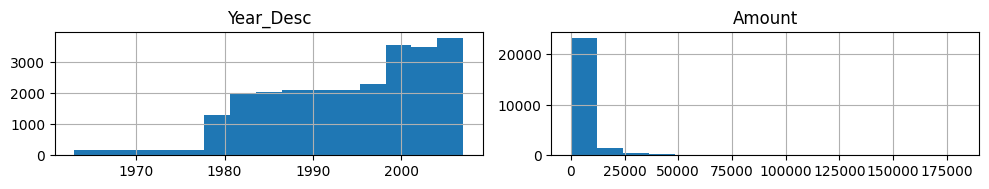

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
data[numerical_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()


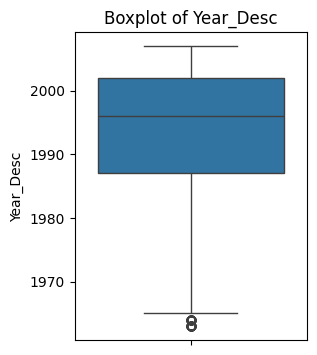

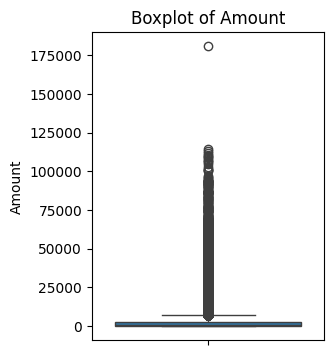

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column and plot a boxplot if it's numeric
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(3, 4))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


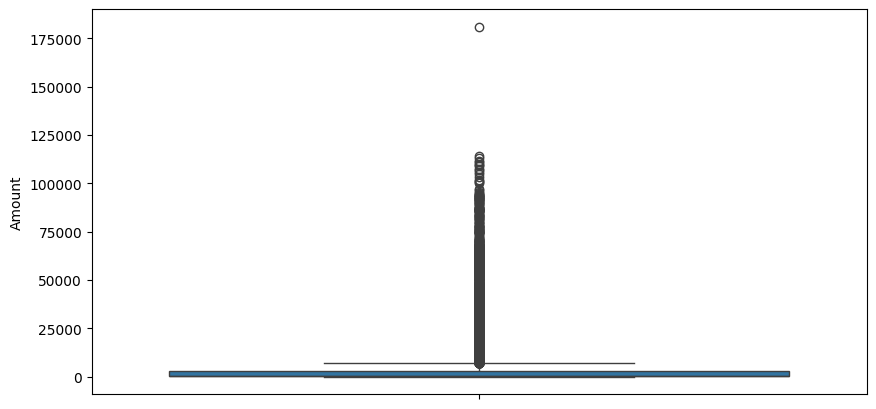

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Amount'])
plt.show()

In [130]:
print(data['Amount'].mean())
print(data['Amount'].std())

4053.0123590193675
10145.180669194968


#### z-score method

In [131]:
data['z_score']=(data['Amount']-data['Amount'].mean())/data['Amount'].std()
print(data.head())

  Geography_Desc  Year_Desc                    Category    Commodity_Desc  \
0          Anhui       2007            Apple production            apples   
1          Anhui       2007  Aquatic product production  Aquatic products   
2          Anhui       2007  Cattle & buffalo inventory  Cattle & buffalo   
3          Anhui       2007             Corn production              corn   
4          Anhui       2007              Corn sown area              corn   

   Amount      Unit_Desc   z_score  
0   403.6      1000 tons -0.359719  
1   166.5    10,000 tons -0.383090  
2   143.0    10,000 head -0.385406  
3  2500.0      1000 tons -0.153079  
4   710.4  1000 hectares -0.329478  


In [132]:
#data with outliers
print(data.loc[(data['z_score']>3)|(data['z_score']<-3)])

      Geography_Desc  Year_Desc          Category    Commodity_Desc   Amount  \
26             Anhui       2007  Rural population  rural population  37503.3   
31             Anhui       2007  Total population  total population  61180.0   
71             Anhui       2006  Total population  total population  61100.0   
113            Anhui       2005  Total population  total population  61200.0   
154            Anhui       2004  Total population  total population  64610.0   
...              ...        ...               ...               ...      ...   
25497       Zhejiang       1986  Total population  total population  40701.0   
25522       Zhejiang       1985  Total population  total population  40300.0   
25547       Zhejiang       1984  Total population  total population  39930.0   
25572       Zhejiang       1983  Total population  total population  39631.0   
25597       Zhejiang       1982  Total population  total population  39240.0   

       Unit_Desc   z_score  
26        

In [133]:
#data without outliers
new_data=data[(data['z_score']>-3)&(data['z_score']<3)]
print(new_data)

      Geography_Desc  Year_Desc                    Category    Commodity_Desc  \
0              Anhui       2007            Apple production            apples   
1              Anhui       2007  Aquatic product production  Aquatic products   
2              Anhui       2007  Cattle & buffalo inventory  Cattle & buffalo   
3              Anhui       2007             Corn production              corn   
4              Anhui       2007              Corn sown area              corn   
...              ...        ...                         ...               ...   
25698       Zhejiang       1965             Grain sown area       total grain   
25699       Zhejiang       1964            Grain production       total grain   
25700       Zhejiang       1964             Grain sown area       total grain   
25701       Zhejiang       1963            Grain production       total grain   
25702       Zhejiang       1963             Grain sown area       total grain   

            Amount      Uni

In [134]:
#capping used to remove the outliers
new_data=data.copy()
upper_limit=data['Amount'].mean()+3*data['Amount'].std()
lower_limit=data['Amount'].mean()-3*data['Amount'].std()
print("upper_limit is",upper_limit)
print("lower_limit is",lower_limit)
new_data.loc[(new_data['Amount']>upper_limit,'Amount')]=upper_limit
new_data.loc[(new_data['Amount']<lower_limit,'Amount')]=lower_limit
print(new_data)

upper_limit is 34488.55436660427
lower_limit is -26382.529648565534
      Geography_Desc  Year_Desc                    Category    Commodity_Desc  \
0              Anhui       2007            Apple production            apples   
1              Anhui       2007  Aquatic product production  Aquatic products   
2              Anhui       2007  Cattle & buffalo inventory  Cattle & buffalo   
3              Anhui       2007             Corn production              corn   
4              Anhui       2007              Corn sown area              corn   
...              ...        ...                         ...               ...   
25698       Zhejiang       1965             Grain sown area       total grain   
25699       Zhejiang       1964            Grain production       total grain   
25700       Zhejiang       1964             Grain sown area       total grain   
25701       Zhejiang       1963            Grain production       total grain   
25702       Zhejiang       1963          

<Axes: ylabel='Amount'>

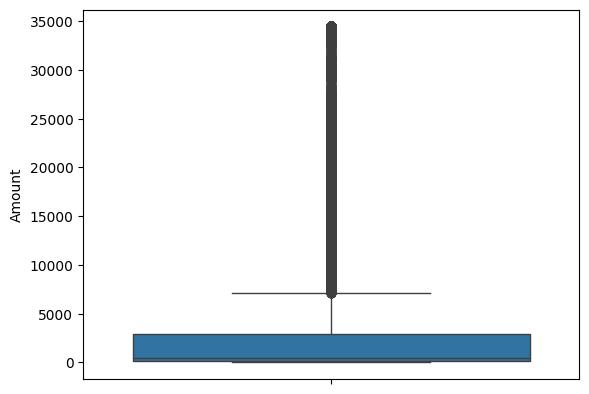

In [135]:
sns.boxplot(new_data['Amount'])

#### IQR METHOD

In [136]:
#IQR
q1=data['Amount'].quantile(0.25)
q3=data['Amount'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(100.0, 2921.45, 2821.45)

In [137]:
new_data=data.copy()
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(7153.624999999999, -4132.174999999999)

<Axes: ylabel='Amount'>

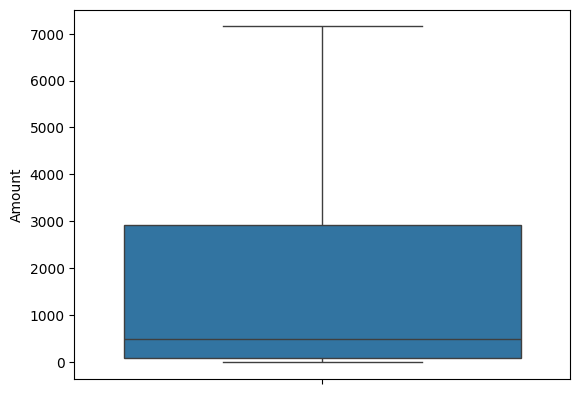

In [138]:
new_data.loc[(new_data['Amount']>upper_limit,'Amount')]=upper_limit
new_data.loc[(new_data['Amount']<lower_limit,'Amount')]=lower_limit
sns.boxplot(new_data['Amount'])

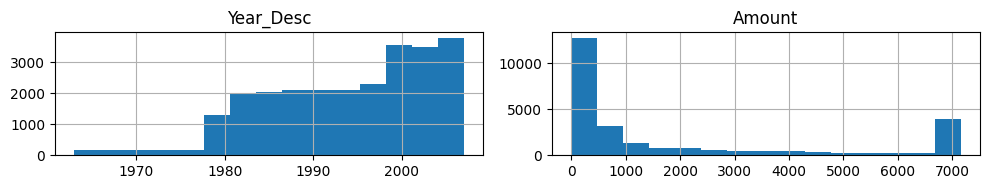

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
new_data[numerical_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()


<Axes: xlabel='Amount', ylabel='Count'>

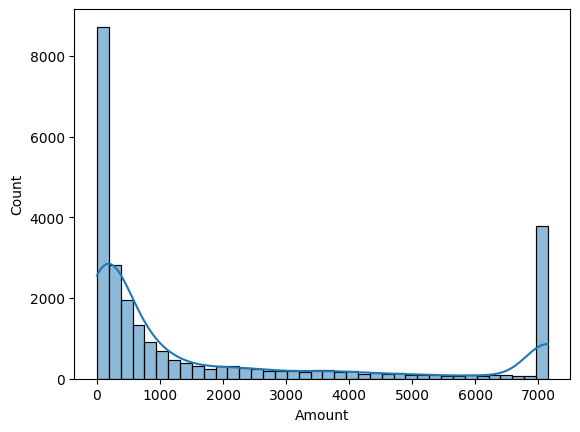

In [140]:
sns.histplot(data=new_data,x=new_data.Amount,kde=True)

In [141]:
print(new_data['Amount'].mean())
print(new_data['Amount'].median())

1905.7267601022113
494.0


In [142]:
new_data['Amount'].skew()

1.2314573070049606

In [143]:
kurtosis(new_data['Amount'],fisher=False)

2.8850927858799276

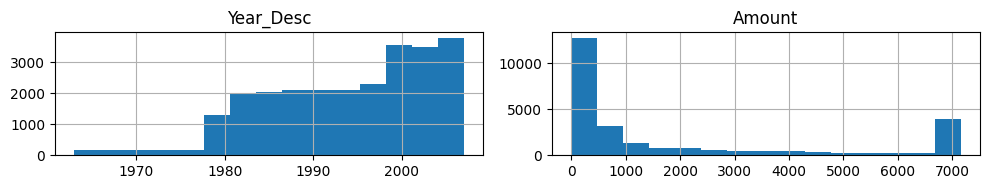

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
new_data[numerical_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()

C:\Users\AP\AppData\Local\Temp\ipykernel_17380\3878712520.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=new_data,palette='Set2')


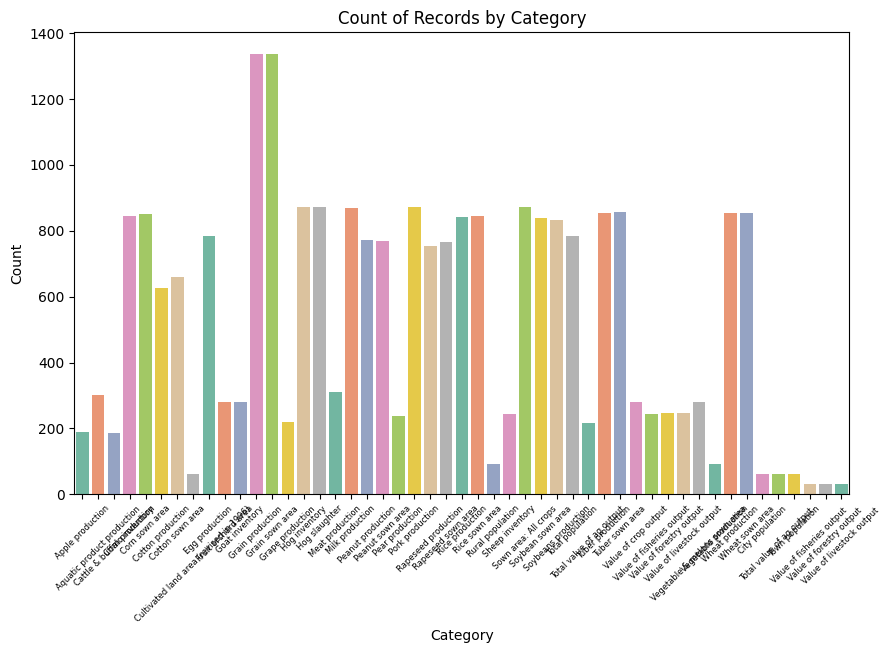

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=new_data,palette='Set2')

plt.title('Count of Records by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45,fontsize=6)
plt.show()


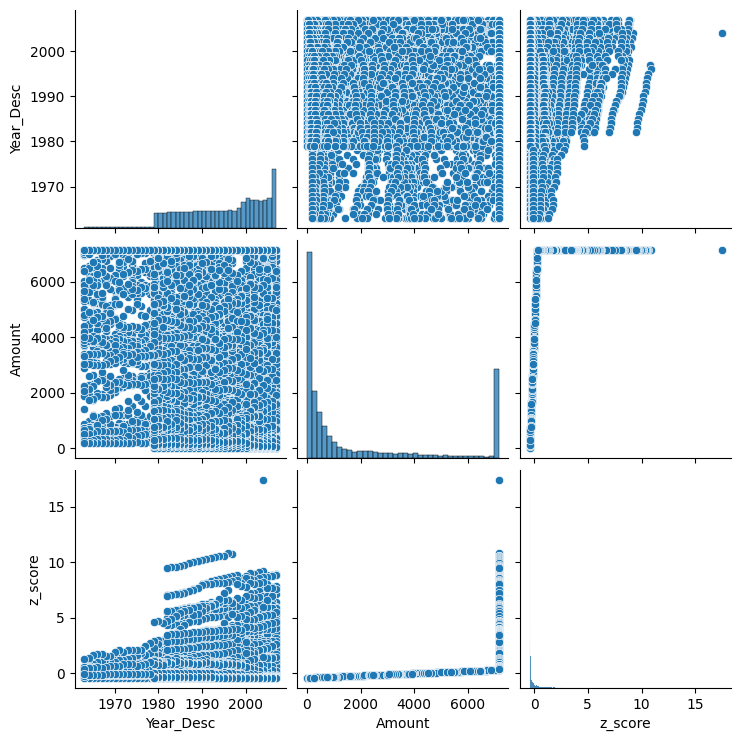

In [146]:
sns.pairplot(new_data)
plt.show()

## Categorical encoding

In [150]:

categorical_cols = new_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['Geography_Desc', 'Category', 'Commodity_Desc', 'Unit_Desc'], dtype='object')


In [154]:

data_encoded = pd.get_dummies(data=new_data, drop_first=True)  # Converts categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Category'] = le.fit_transform(new_data['Category'])  
new_data['Geography_Desc']=le.fit_transform(new_data['Geography_Desc'])
new_data['Commodity_Desc']=le.fit_transform(new_data['Commodity_Desc'])
new_data['Unit_Desc']=le.fit_transform(new_data['Unit_Desc'])

In [155]:
data_encoded

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc,z_score
0,0,2007,0,15,403.600000,6,-0.359719
1,0,2007,1,0,166.500000,1,-0.383090
2,0,2007,2,1,143.000000,0,-0.385406
3,0,2007,4,17,2500.000000,6,-0.153079
4,0,2007,5,17,710.400000,5,-0.329478
...,...,...,...,...,...,...,...
25698,31,1965,13,33,2976.000000,5,-0.106160
25699,31,1964,12,33,7153.625000,6,0.458542
25700,31,1964,13,33,3012.600000,5,-0.102552
25701,31,1963,12,33,7153.625000,6,0.405807


In [156]:
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Year_Desc', 'Amount', 'z_score'], dtype='object')


## Feature scaling

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Year_Desc', 'Amount'] 
data_encoded[numerical_cols] = scaler.fit_transform(new_data[numerical_cols])
print(data_encoded.head())



   Geography_Desc  Year_Desc  Category  Commodity_Desc    Amount  Unit_Desc  \
0               0   1.345345         0              15 -0.582267          6   
1               0   1.345345         1               0 -0.674173          1   
2               0   1.345345         2               1 -0.683282          0   
3               0   1.345345         4              17  0.230357          6   
4               0   1.345345         5              17 -0.463342          5   

    z_score  
0 -0.359719  
1 -0.383090  
2 -0.385406  
3 -0.153079  
4 -0.329478  


## Feature Selection

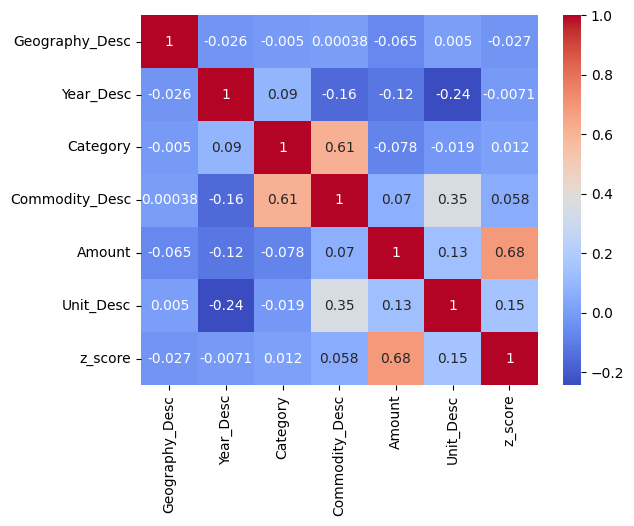

In [158]:
# Correlation Matrix for feature selection
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = new_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# You can drop less correlated features or use techniques like PCA


In [159]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data_encoded.drop('Amount', axis=1)  
y = data_encoded['Amount']

# Select the best 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
scores = selector.scores_

# Get feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(


          Feature     Score
4       Unit_Desc  2.120802
1       Year_Desc  1.429200
2        Category  1.261463
5         z_score  1.102775
0  Geography_Desc  1.020752
3  Commodity_Desc  0.988739


In [160]:
from sklearn.ensemble import RandomForestClassifier
X_new = X.drop(columns=['z_score'])



model = RandomForestRegressor()
model.fit(X_new, y)

# Get feature importances
importances = model.feature_importances_

# Get feature names and their importance scores
feature_importances = pd.DataFrame({'Feature': X_new.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))


          Feature  Importance
0  Geography_Desc    0.321443
2        Category    0.298792
3  Commodity_Desc    0.242263
4       Unit_Desc    0.113716
1       Year_Desc    0.023786


In [161]:
# Select top important features based on importance scores
selected_features = ['Geography_Desc', 'Category', 'Commodity_Desc', 'Unit_Desc']

# Filter the dataset to include only these selected features
X_top = X[selected_features]

# Initialize and train the RandomForestRegressor on the new dataset
model = RandomForestRegressor()
model.fit(X_top, y)

# Evaluate the model (e.g., using cross-validation or test set evaluation)


RandomForestRegressor()

In [60]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_top)
print("R2 Score:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))


R2 Score: 0.9704347499631473
MAE: 0.07682973767818611


###### An R² value close to 1 indicates that the model explains nearly all the variance in the target variable. In this case, an R² of 0.970 means that your model is very effective at predicting the target based on the selected features.
###### Generally, values above 0.9 are considered excellent, while values closer to 1 indicate a perfect fit .
###### MAE measures the average absolute difference between predicted values and actual values. A lower MAE indicates better predictive accuracy.
###### An MAE of 0.0766 suggests that on average, your predictions are off by only about 0.0766 units, which is quite precise.

## Splitting data

In [162]:
# Split into features and target variable
X = data_encoded.drop('Amount', axis=1)  
y = data_encoded['Amount']



#### Train test splitting

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)


### Model Implimentation

In [168]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'adaBoost Regressor':  AdaBoostRegressor()
}

### Model Evaluation

In [173]:
# Train and test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store results
    results[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }
# Display the evaluation results
results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,RMSE,MAE
Linear Regression,0.041313,0.962057,0.980845,0.796918
Decision Tree Regressor,0.958529,0.041617,0.204003,0.084636
Random Forest Regressor,0.962466,0.037666,0.194078,0.084319
Gradient Boosting Regressor,0.759506,0.241340,0.491263,0.348777
adaBoost Regressor,0.517908,0.483786,0.695548,0.574881


## MLP

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MLPRegressor Mean Squared Error: {mse}")
print(f"MLPRegressor R-squared: {r2}")

MLPRegressor Mean Squared Error: 0.0014672327017797603
MLPRegressor R-squared: 0.9985379071810858


## Hyper parameter tuning

In [184]:
# Hyperparameter tuning for Random Forest as an example
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=models['Random Forest Regressor'], param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [185]:
# Train and test models
best_rf = grid_search.best_estimator_
results_after = {}
for model_name, model in models.items():
    if model_name == 'Random Forest Regressor':
        model = best_rf
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store results
    results_after[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
    }

In [186]:
# Display the evaluation results
results_after_df = pd.DataFrame(results_after).T
results_after_df

,R2 Score,MSE
Linear Regression,0.041313,0.962057
Decision Tree Regressor,0.958529,0.041617
Random Forest Regressor,0.906248,0.094081
Gradient Boosting Regressor,0.759506,0.241340
adaBoost Regressor,0.501115,0.500639


## Best performing model

In [187]:
# Identify the best performing model
best_model_name = results_after_df['R2 Score'].idxmax()
print(f"The best performing model is: {best_model_name}")

The best performing model is: Decision Tree Regressor


### Conclusion


###### The project effectively demonstrates the end-to-end process of building a machine learning model to predict production quantities. The use of

###### multiple models and thorough evaluation ensures that the best possible model is selected. The hyperparameter tuning further enhances the model’s 

###### performance, making it robust and reliable for real-world applications.